In [280]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [282]:
train_df.shape

(1460, 81)

In [284]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

This dataset contains 81 columns, 19 of which have missing values.
Key observations include:

* LotFrontage has 1,201 non-null entries out of 1,460.
* Alley has only 91 non-null entries.

* MasVnrType has 588 non-null entries.

* Basement-related columns have 1,423 non-null entries.

* Electrical has 1,459 non-null entries.

* FireplaceQu has 770 non-null entries.

* Garage-related columns have 1,379 non-null entries.

* PoolQC has only 7 non-null entries.

* Fence has 281 non-null entries.

* MiscFeature has 54 non-null entries.

## Data Cleaning and Preprocesing

### Missing values

In [289]:
# checking if there is some missing values
pd.set_option('display.max_rows', None)
missing_values = train_df.isnull().sum()
print(missing_values)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Missing values in LotFrontage

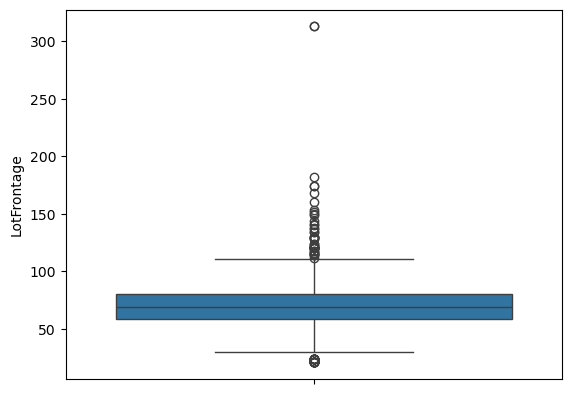

In [292]:
# using boxplot to visualize the outliers
sb.boxplot(data=train_df['LotFrontage'])
plt.show()

In [294]:
# using median imputation to handle missing values in 'LotFrontage'
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())

In [296]:
print(f'Missing values in LotFrontage after median imputation {train_df['LotFrontage'].isnull().sum()}')

Missing values in LotFrontage after median imputation 0


#### Missing values in Alley

In [299]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [301]:
# NAN in this columns means there is no alley acces, filling NAN with 'no_alley'
print(f'Missing values in Alley before filling {train_df['Alley'].isnull().sum()}')
train_df['Alley'] = train_df['Alley'].fillna('NoAlley')
print(f'Missing values in Alley after filling {train_df['Alley'].isnull().sum()}')

Missing values in Alley before filling 1369
Missing values in Alley after filling 0


#### Missing value in MasVnrType

In [304]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [306]:
# NAN in this column means no Masonry Veneer, filling NAN with 'none'
print(f'Missing values in MasVnrType before filling {train_df['MasVnrType'].isnull().sum()}')
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')
print(f'Missing values in MasVnrType after filling {train_df['MasVnrType'].isnull().sum()}')

Missing values in MasVnrType before filling 872
Missing values in MasVnrType after filling 0


#### Missing values in MasVnrArea

In [309]:
# filling mising values with the median
print(f'Missing values in MasVnrArea before filling {train_df['MasVnrArea'].isnull().sum()}')
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median())
print(f'Missing values in MasVnrArea after filling {train_df['MasVnrArea'].isnull().sum()}')

Missing values in MasVnrArea before filling 8
Missing values in MasVnrArea after filling 0


#### Missing Values in Basement related columns

In [312]:
# NAN in BsmtQual column means no basement, fill NAN with 'NBsmt'
print(f'Missing values in BsmtQual before filling {train_df['BsmtQual'].isnull().sum()}')
train_df['BsmtQual'] = train_df['BsmtQual'].fillna('NoBsmt')
print(f'Missing values in BsmtQual after filling {train_df['BsmtQual'].isnull().sum()}')

Missing values in BsmtQual before filling 37
Missing values in BsmtQual after filling 0


In [314]:
# droping the other basement related columns
train_df.drop(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'],axis=1, inplace=True)

#### Missing Values in Electrical

In [317]:
# using mode imputation in Electrical
print(f'Missing values in Electrical before filling {train_df['Electrical'].isnull().sum()}')
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
print(f'Missing values in Electrical after filling {train_df['Electrical'].isnull().sum()}')

Missing values in Electrical before filling 1
Missing values in Electrical after filling 0


#### Missing Values in FireplaceQu

In [320]:
# NAN means no FirePlace, filling missing values with 'NoFirePlc'
print(f'Missing values in FireplaceQu before filling {train_df['FireplaceQu'].isnull().sum()}')
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('NoFirePlc')
print(f'Missing values in FireplaceQu after filling {train_df['FireplaceQu'].isnull().sum()}')

Missing values in FireplaceQu before filling 690
Missing values in FireplaceQu after filling 0


#### Missing Values in Garage related columns

In [323]:
# NAN means no Garage, filling missing values with 'NoGarage'
for i in ['GarageType','GarageQual']:
    print(f'Missing values in {i} before filling {train_df[i].isnull().sum()}')
    train_df[i] = train_df[i].fillna('NoGarage')
    print(f'Missing values in {i} after filling {train_df[i].isnull().sum()}')

Missing values in GarageType before filling 81
Missing values in GarageType after filling 0
Missing values in GarageQual before filling 81
Missing values in GarageQual after filling 0


In [325]:
# droping the other garage related columns
train_df.drop(['GarageYrBlt','GarageFinish', 'GarageCond'],axis=1, inplace=True)

#### Missing Values in PoolQC

In [328]:
# NAN means no pool, filling missing values with 'NoPool'
print(f'Missing values in PoolQC before filling {train_df['PoolQC'].isnull().sum()}')
train_df.loc[(train_df['PoolArea'] == 0) & (train_df['PoolQC'].isnull()), 'PoolQC'] = 'NoPool'
print(f'Missing values in PoolQC after filling {train_df['PoolQC'].isnull().sum()}')

Missing values in PoolQC before filling 1453
Missing values in PoolQC after filling 0


#### Missing Values in Fence

In [331]:
# NAN means no fence, filling with 'NoFence'
print(f'Missing values in Fence before filling {train_df['Fence'].isnull().sum()}')
train_df['Fence'] = train_df['Fence'].fillna('NoFence')
print(f'Missing values in Fence after filling {train_df['Fence'].isnull().sum()}')

Missing values in Fence before filling 1179
Missing values in Fence after filling 0


#### Missing Value in MiscFeature

In [334]:
# NAN means no Miscellaneous feature, fill NAN with 'None'
print(f'Missing values in MiscFeature before filling {train_df['MiscFeature'].isnull().sum()}')
train_df['MiscFeature'] = train_df['MiscFeature'].fillna('None')
print(f'Missing values in MiscFeature after filling {train_df['MiscFeature'].isnull().sum()}')

Missing values in MiscFeature before filling 1406
Missing values in MiscFeature after filling 0


In [336]:
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageCars  

In [338]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,1,2008,WD,Normal,118000


There is no more missing values in this dataset, now starts the categorical encoding.

In [341]:
# pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', None)

### Categorical Encoding

In [344]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64


In [346]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_columns = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
               'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle',
               'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
               'Foundation', 'Heating', 'Electrical', 'MiscFeature', 'SaleType', 'SaleCondition']
for i in cat_columns:
    train_df[i] = le.fit_transform(train_df[i])

In [348]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape           int32
LandContour        int32
Utilities         object
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation         int32
BsmtQual          object
TotalBsmtSF        int64
Heating            int32
HeatingQC         object
CentralAir        object
Electrical         int32
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64


### Ordinal Encoding

In [351]:
# making a tupple for all the columns that needs a ordinal encoding
ordinal_cat = {
    'Alley' : {'NoAlley': 0, 'Pave': 1, 'Grvl': 2},
    'Utilities' : {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3},
    'ExterQual' : {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'ExterCond' : {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, 
    'BsmtQual' : {'NoBsmt': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'HeatingQC' : {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'KitchenQual' : {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'Functional' : {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7},
    'FireplaceQu' : {'NoFirePlc': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageType' : {'NoGarage': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6},
    'GarageQual' : {'NoGarage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'PoolQC' : {'NoPool': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'Fence' : {'NoFence': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
}

# appling ordinal encoding in the columns
for column, order in ordinal_cat.items():
    mapping = {cat: idx for idx, cat in enumerate(order)}
    train_df[column] = train_df[column].map(mapping)

In [353]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Pave,0,3,3,3,...,0,0,0,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,Pave,0,3,3,3,...,0,0,0,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,Pave,0,0,3,3,...,0,0,0,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,Pave,0,0,3,3,...,0,0,0,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,Pave,0,0,3,3,...,0,0,0,1,0,12,2008,8,4,250000
5,6,50,3,85.0,14115,Pave,0,0,3,3,...,0,0,3,3,700,10,2009,8,4,143000
6,7,20,3,75.0,10084,Pave,0,3,3,3,...,0,0,0,1,0,8,2007,8,4,307000
7,8,60,3,69.0,10382,Pave,0,0,3,3,...,0,0,0,3,350,11,2009,8,4,200000
8,9,50,4,51.0,6120,Pave,0,3,3,3,...,0,0,0,1,0,4,2008,8,0,129900
9,10,190,3,50.0,7420,Pave,0,3,3,3,...,0,0,0,1,0,1,2008,8,4,118000


### One-Hot Encoding

In [356]:
street_enc = pd.get_dummies(train_df['Street']).astype(int)
central_air_enc = pd.get_dummies(train_df['CentralAir']).astype(int)
paved_drive_enc = pd.get_dummies(train_df['PavedDrive'], drop_first = True).astype(int)

In [358]:
train_df_enc = pd.concat([train_df, street_enc, central_air_enc, paved_drive_enc], axis=1)
train_df_enc.drop(['Street', 'CentralAir', 'PavedDrive'], axis=1, inplace=True)

In [360]:
train_df_enc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,Grvl,Pave,N,Y,P,Y
0,1,60,3,65.0,8450,0,3,3,3,4,...,2008,8,4,208500,0,1,0,1,0,1
1,2,20,3,80.0,9600,0,3,3,3,2,...,2007,8,4,181500,0,1,0,1,0,1
2,3,60,3,68.0,11250,0,0,3,3,4,...,2008,8,4,223500,0,1,0,1,0,1
3,4,70,3,60.0,9550,0,0,3,3,0,...,2006,8,0,140000,0,1,0,1,0,1
4,5,60,3,84.0,14260,0,0,3,3,2,...,2008,8,4,250000,0,1,0,1,0,1


### Checking for Multicollinearity

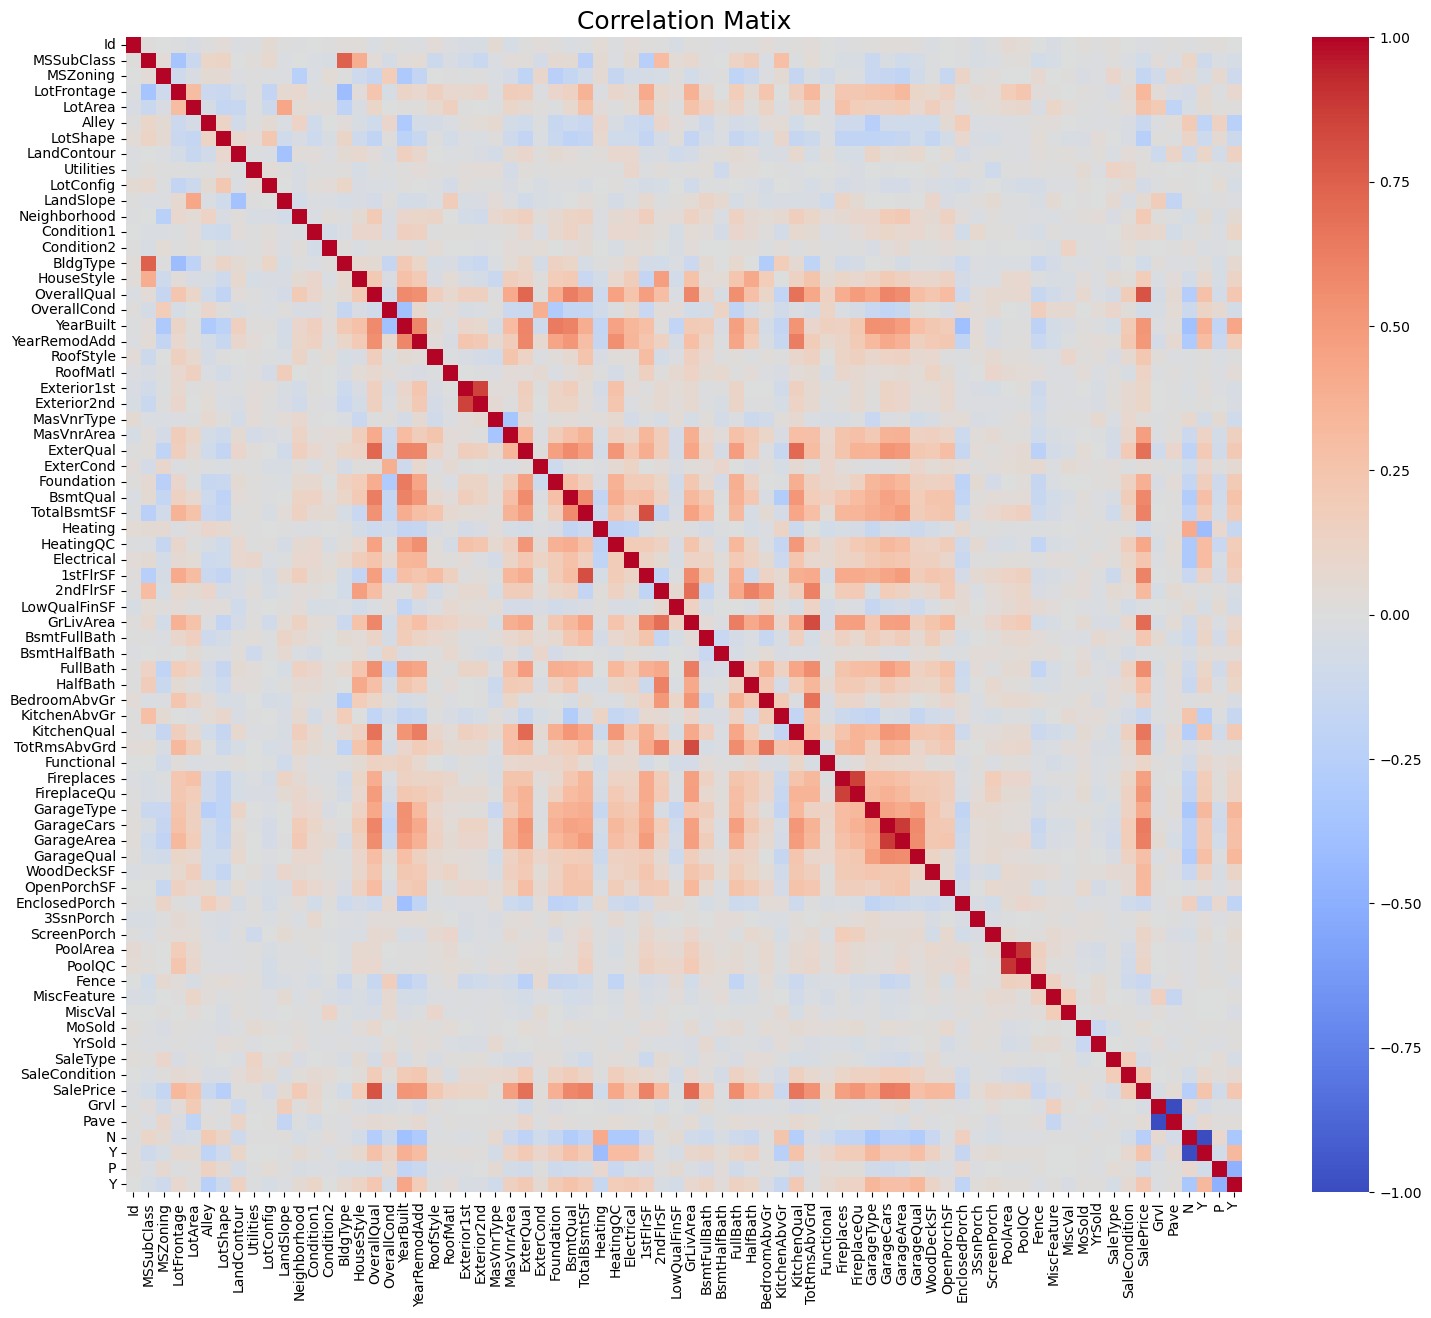

In [363]:
#get the correlation matrix
corr_matrix = train_df_enc.corr()

# Plot
plt.figure(figsize=(18, 15))
sb.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matix', fontsize=18)
plt.show()

#### VIF (Variance Inflation Factor)

In [365]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# drop the target feature and 'id' to check multicollinearity
x = train_df_enc.drop(columns=['SalePrice', 'Id'], axis=1)

vif = pd.DataFrame()
vif["Feature"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif.sort_values(by="VIF", ascending=False))

C:\Users\car_f\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          Feature       VIF
36      GrLivArea       inf
69              Y       inf
68              N       inf
67           Pave       inf
66           Grvl       inf
35   LowQualFinSF       inf
34       2ndFlrSF       inf
33       1stFlrSF       inf
17      YearBuilt  7.188785
49     GarageCars  6.219663
58         PoolQC  6.215313
29    TotalBsmtSF  5.923247
50     GarageArea  5.805507
57       PoolArea  5.776652
0      MSSubClass  5.287491
44   TotRmsAbvGrd  5.269173
47    FireplaceQu  4.936001
46     Fireplaces  4.845829
13       BldgType  4.571567
21    Exterior1st  4.078848
22    Exterior2nd  4.046595
15    OverallQual  4.037323
25      ExterQual  3.299808
28       BsmtQual  3.253566
39       FullBath  3.115533
18   YearRemodAdd  2.918957
43    KitchenQual  2.782145
41   BedroomAbvGr  2.539997
40       HalfBath  2.305739
14     HouseStyle  2.227728
51     GarageQual  2.193596
27     Foundation  2.068666
48     GarageType  2.067561
16    OverallCond  2.042323
71              Y  1

##### Observations:

'GrLivArea', 'Y', 'N', 'Pave', 'Grvl', 'LowQualFinSF', '2ndFlrSF' and '1stFlrSF' have a infinite VIF, I'll drop this columns, also 'YearBuilt', 'GarageCars',  'TotalBsmtSF', 'GarageArea' and 'PoolArea' have a high VIF, also I'll drop this columns. 

### Featuring Scaling and Data Spliting

In [371]:
from sklearn.model_selection import train_test_split

# spliting the target features and independet features
x= train_df_enc.drop(['SalePrice','Id','GrLivArea', 'Y', 'N', 'Pave', 'Grvl', 'LowQualFinSF', '2ndFlrSF',
        '1stFlrSF', 'YearBuilt', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'PoolArea'], axis=1)
y = train_df_enc['SalePrice']

# spliting de data in to train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Size of training data: {x_train.shape[0]}")
print(f"Size of test data: {x_test.shape[0]}")

Size of training data: 1168
Size of test data: 292


In [373]:
from sklearn.preprocessing import RobustScaler

# aplying robust scaler since there are outliers
rs = RobustScaler()
x_train_scal = rs.fit_transform(x_train)
x_test_scal = rs.transform(x_test)

x_train = pd.DataFrame(x_train_scal, columns = x_train.columns, index = x_train.index)
x_test = pd.DataFrame(x_test_scal, columns = x_test.columns, index = x_test.index)

In [375]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,P
254,-0.6,0.0,0.052632,-0.291776,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0
1066,0.2,0.0,-0.526316,-0.428667,0.0,-1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.333333,0.5,0.0,0.0,0.0
638,-0.4,0.0,-0.105263,-0.200109,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,3.0,0.0,0.0,-0.333333,0.0,0.0,0.0,1.0
799,0.0,0.0,-0.473684,-0.583551,0.0,0.0,0.0,0.0,-1.333333,0.0,...,0.0,0.0,3.0,0.0,0.0,0.000000,-0.5,0.0,0.0,0.0
380,0.0,0.0,-1.000000,-1.118473,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.333333,1.0,0.0,0.0,0.0


## Machine Learning Model

### Random Forest Regressor

In [379]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# create and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [380]:
# predict
y_pred_rf = rf.predict(x_test)

In [381]:
# model evaluation
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))

Random Forest RMSE: 1150873729.817543
Random Forest R^2: 0.8499576551595459


### Linear Regression

In [386]:
from sklearn.linear_model import LinearRegression

# create and train the model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [388]:
# predict
y_pred_lr = lr.predict(x_test)

In [390]:
# model evaluation
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R^2:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 1426235260.4444401
Linear Regression R^2: 0.8140580697717846


### Observations:

Random Forest Regressor have a better R2 score, I choose this model to use it in the test data, bur before taht I think this model can have an improvement, so I'll apply GridSearch CV to check if there is an improvement.

### Grid Search CV for Random Forest

In [547]:
from sklearn.model_selection import GridSearchCV

# define parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

#  GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)

# fit the model
grid_search.fit(x_train, y_train)

# print the results
print("Best Parameters:")
print(grid_search.best_params_)

Best Parameters:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [549]:
# predict using best estimators
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)

In [551]:
# model evaluation
print("Best Random Forest RMSE:", mean_squared_error(y_test, y_pred_best_rf))
print("Best Random Forest R^2:", r2_score(y_test, y_pred_best_rf))

Best Random Forest RMSE: 1227223110.219177
Best Random Forest R^2: 0.8400037916158944


#### Observations

After Grid Search CV the first model still have a better R2 score so I'm gonna use that model for the test df.

## Using Randon Forest Model in the Test df

In [398]:
test_df.shape

(1459, 80)

In [400]:
missing_values = test_df.isnull().sum()
print(missing_values)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Data Cleaning and Preprocesing

#### Missing Values

In [404]:
# Missing Values in MSZoning
## using mode imputation to fill missing values in MSZoning
print(f'Missing values in MSZoning before filling {test_df['MSZoning'].isnull().sum()}')
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
print(f'Missing values in MSZoning after filling {test_df['MSZoning'].isnull().sum()}')

Missing values in MSZoning before filling 4
Missing values in MSZoning after filling 0


In [406]:
# Missing Values in LotFrontage 
## filling mising values with the median
print(f'Missing values in LotFrontage before filling {test_df['LotFrontage'].isnull().sum()}')
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].median())
print(f'Missing values in LotFrontage after filling {test_df['LotFrontage'].isnull().sum()}')

Missing values in LotFrontage before filling 227
Missing values in LotFrontage after filling 0


In [408]:
# Missin values in Alley
## NAN in this columns means there is no alley acces, filling NAN with 'no_alley'
print(f'Missing values in Alley before filling {test_df['Alley'].isnull().sum()}')
test_df['Alley'] = test_df['Alley'].fillna('NoAlley')
print(f'Missing values in Alley after filling {test_df['Alley'].isnull().sum()}')

Missing values in Alley before filling 1352
Missing values in Alley after filling 0


In [410]:
# Missing Values in Utilities
## Filling mising values with mode
print(f'Missing values in Utilities before filling {test_df['Utilities'].isnull().sum()}')
test_df['Utilities'] = test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
print(f'Missing values in Utilities after filling {test_df['Utilities'].isnull().sum()}')

Missing values in Utilities before filling 2
Missing values in Utilities after filling 0


In [412]:
# Missing Values Exterior1st
## Filling mising values with mode
print(f'Missing values in Exterior1st before filling {test_df['Exterior1st'].isnull().sum()}')
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
print(f'Missing values in Exterior1st after filling {test_df['Exterior1st'].isnull().sum()}')

Missing values in Exterior1st before filling 1
Missing values in Exterior1st after filling 0


In [414]:
# Missing Values Exterior2nd
## Filling mising values with mode
print(f'Missing values in Exterior2nd before filling {test_df['Exterior2nd'].isnull().sum()}')
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
print(f'Missing values in Exterior2nd after filling {test_df['Exterior2nd'].isnull().sum()}')

Missing values in Exterior2nd before filling 1
Missing values in Exterior2nd after filling 0


In [416]:
# Missing values in MasVnrType
## NAN in this column means no Masonry Veneer, filling NAN with 'none'
print(f'Missing values in MasVnrType before filling {test_df['MasVnrType'].isnull().sum()}')
test_df['MasVnrType'] = test_df['MasVnrType'].fillna('None')
print(f'Missing values in MasVnrType after filling {test_df['MasVnrType'].isnull().sum()}')

Missing values in MasVnrType before filling 894
Missing values in MasVnrType after filling 0


In [418]:
# Missing Values in MasVnrArea
## filling mising values with the median
print(f'Missing values in MasVnrArea before filling {test_df['MasVnrArea'].isnull().sum()}')
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].median())
print(f'Missing values in MasVnrArea after filling {test_df['MasVnrArea'].isnull().sum()}')

Missing values in MasVnrArea before filling 15
Missing values in MasVnrArea after filling 0


In [420]:
# Missing Values in Basement related columns
## NAN in BsmtQual column means no basement, fill NAN with 'NBsmt'
print(f'Missing values in BsmtQual before filling {test_df['BsmtQual'].isnull().sum()}')
test_df['BsmtQual'] = test_df['BsmtQual'].fillna('NoBsmt')
print(f'Missing values in BsmtQual after filling {test_df['BsmtQual'].isnull().sum()}')

Missing values in BsmtQual before filling 44
Missing values in BsmtQual after filling 0


In [422]:
##  droping the other basement related columns
test_df.drop(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'],axis=1, inplace=True)

In [424]:
## missing values in TotalBsmtSF
### filling mising values with the median
print(f'Missing values in TotalBsmtSF before filling {test_df['TotalBsmtSF'].isnull().sum()}')
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].median())
print(f'Missing values in TotalBsmtSF after filling {test_df['TotalBsmtSF'].isnull().sum()}')

Missing values in TotalBsmtSF before filling 1
Missing values in TotalBsmtSF after filling 0


In [426]:
# Missing values in BsmtFullBath
## filling mising values with the median
print(f'Missing values in BsmtFullBath before filling {test_df['BsmtFullBath'].isnull().sum()}')
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].median())
print(f'Missing values in BsmtFullBath after filling {test_df['BsmtFullBath'].isnull().sum()}')

Missing values in BsmtFullBath before filling 2
Missing values in BsmtFullBath after filling 0


In [428]:
# Missing values in BsmtHalfBath
## filling mising values with the median
print(f'Missing values in BsmtHalfBath before filling {test_df['BsmtHalfBath'].isnull().sum()}')
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].median())
print(f'Missing values in BsmtHalfBath after filling {test_df['BsmtHalfBath'].isnull().sum()}')

Missing values in BsmtHalfBath before filling 2
Missing values in BsmtHalfBath after filling 0


In [430]:
# Missing Values in KitchenQual
## Filling mising values with mode
print(f'Missing values in KitchenQual before filling {test_df['KitchenQual'].isnull().sum()}')
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
print(f'Missing values in KitchenQual after filling {test_df['KitchenQual'].isnull().sum()}')

Missing values in KitchenQual before filling 1
Missing values in KitchenQual after filling 0


In [432]:
# Missing values in Functional
## Filling mising values with mode
print(f'Missing values in Functional before filling {test_df['Functional'].isnull().sum()}')
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode()[0])
print(f'Missing values in Functional after filling {test_df['Functional'].isnull().sum()}')

Missing values in Functional before filling 2
Missing values in Functional after filling 0


In [434]:
# Missing Values in FireplaceQu
## NAN means no FirePlace, filling missing values with 'NoFirePlc'
print(f'Missing values in FireplaceQu before filling {test_df['FireplaceQu'].isnull().sum()}')
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('NoFirePlc')
print(f'Missing values in FireplaceQu after filling {test_df['FireplaceQu'].isnull().sum()}')

Missing values in FireplaceQu before filling 730
Missing values in FireplaceQu after filling 0


In [436]:
# Missing Values in Garage related columns
## NAN means no Garage, filling missing values with 'NoGarage'
for i in ['GarageType','GarageQual']:
    print(f'Missing values in {i} before filling {test_df[i].isnull().sum()}')
    test_df[i] = test_df[i].fillna('NoGarage')
    print(f'Missing values in {i} after filling {test_df[i].isnull().sum()}')

Missing values in GarageType before filling 76
Missing values in GarageType after filling 0
Missing values in GarageQual before filling 78
Missing values in GarageQual after filling 0


In [438]:
## droping the other garage related columns
test_df.drop(['GarageYrBlt','GarageFinish', 'GarageCond'],axis=1, inplace=True)

In [440]:
## filling mising values in GarageCars and GarageArea with median
for i in ['GarageArea', 'GarageCars']:
    print(f'Missing values in {i} before filling {test_df[i].isnull().sum()}')
    test_df[i] = test_df[i].fillna(test_df[i].median())
    print(f'Missing values in {i} after filling {test_df[i].isnull().sum()}')

Missing values in GarageArea before filling 1
Missing values in GarageArea after filling 0
Missing values in GarageCars before filling 1
Missing values in GarageCars after filling 0


In [442]:
# Missing Values in PoolQC
## NAN means no pool, filling missing values with 'NoPool'
print(f'Missing values in PoolQC before filling {test_df['PoolQC'].isnull().sum()}')
test_df['PoolQC'] = test_df['PoolQC'].fillna('NoPool')
print(f'Missing values in PoolQC after filling {test_df['PoolQC'].isnull().sum()}')

Missing values in PoolQC before filling 1456
Missing values in PoolQC after filling 0


In [444]:
# Missing Values in Fence
## NAN means no fence, filling with 'NoFence'
print(f'Missing values in Fence before filling {test_df['Fence'].isnull().sum()}')
test_df['Fence'] = test_df['Fence'].fillna('NoFence')
print(f'Missing values in Fence after filling {test_df['Fence'].isnull().sum()}')

Missing values in Fence before filling 1169
Missing values in Fence after filling 0


In [446]:
# Missing Values in MiscFeature
## NAN means no Miscellaneous feature, fill NAN with 'None'
print(f'Missing values in MiscFeature before filling {test_df['MiscFeature'].isnull().sum()}')
test_df['MiscFeature'] = test_df['MiscFeature'].fillna('None')
print(f'Missing values in MiscFeature after filling {test_df['MiscFeature'].isnull().sum()}')

Missing values in MiscFeature before filling 1408
Missing values in MiscFeature after filling 0


In [448]:
# Missing Value in SaleType
## filling missing values with mode
print(f'Missing values in SaleType before filling {test_df['SaleType'].isnull().sum()}')
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])
print(f'Missing values in SaleType after filling {test_df['SaleType'].isnull().sum()}')

Missing values in SaleType before filling 1
Missing values in SaleType after filling 0


In [450]:
missing_values = test_df.isnull().sum()
print(missing_values)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageCars  

### Categorical Encoding

In [453]:
cat_columns = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
               'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle',
               'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
               'Foundation', 'Heating', 'Electrical', 'MiscFeature', 'SaleType', 'SaleCondition']
for i in cat_columns:
    test_df[i] = le.fit_transform(test_df[i])

### Ordinal Encoding

In [456]:
# making a tupple for all the columns that needs a ordinal encoding
ordinal_cat = {
    'Alley' : {'NoAlley': 0, 'Pave': 1, 'Grvl': 2},
    'Utilities' : {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3},
    'ExterQual' : {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'ExterCond' : {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, 
    'BsmtQual' : {'NoBsmt': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'HeatingQC' : {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'KitchenQual' : {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'Functional' : {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7},
    'FireplaceQu' : {'NoFirePlc': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageType' : {'NoGarage': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6},
    'GarageQual' : {'NoGarage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'PoolQC' : {'NoPool': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'Fence' : {'NoFence': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
}

# appling ordinal encoding in the columns
for column, order in ordinal_cat.items():
    mapping = {cat: idx for idx, cat in enumerate(order)}
    test_df[column] = test_df[column].map(mapping)

### One-Hot Encoding

In [459]:
street_enc = pd.get_dummies(test_df['Street']).astype(int)
central_air_enc = pd.get_dummies(test_df['CentralAir']).astype(int)
paved_drive_enc = pd.get_dummies(test_df['PavedDrive'], drop_first = True).astype(int)

In [461]:
test_df_enc = pd.concat([test_df, street_enc, central_air_enc, paved_drive_enc], axis=1)
test_df_enc.drop(['Street', 'CentralAir', 'PavedDrive'], axis=1, inplace=True)

In [474]:
test_df_enc = test_df_enc.drop(['GrLivArea', 'Y', 'N', 'Pave', 'Grvl', 'LowQualFinSF', '2ndFlrSF',
        '1stFlrSF', 'YearBuilt', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'PoolArea'], axis=1)

In [476]:
test_df_enc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,P
0,1461,20,2,80.0,11622,0,3,3,3,4,...,120,0,3,1,0,6,2010,8,4,0
1,1462,20,3,81.0,14267,0,0,3,3,0,...,0,0,0,0,12500,6,2010,8,4,0
2,1463,60,3,74.0,13830,0,0,3,3,4,...,0,0,3,1,0,3,2010,8,4,0
3,1464,60,3,78.0,9978,0,0,3,3,4,...,0,0,0,1,0,6,2010,8,4,0
4,1465,120,3,43.0,5005,0,0,1,3,4,...,144,0,0,1,0,1,2010,8,4,0


In [478]:
test_df_enc.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Alley              int64
LotShape           int32
LandContour        int32
Utilities          int64
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int32
BsmtQual           int64
Heating            int32
HeatingQC          int64
Electrical         int32
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int64
TotRmsAbvGrd       int64


### Featuring Scaling

In [468]:
x = test_df_enc.drop(['Id','GrLivArea', 'Y', 'N', 'Pave', 'Grvl', 'LowQualFinSF', '2ndFlrSF',
        '1stFlrSF', 'YearBuilt', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'PoolArea'], axis=1)

In [470]:
x_test_scaled = rs.transform(x)

In [482]:
x_test_df_enc = pd.DataFrame(x_test_scaled, columns = x.columns, index = x.index)

### Making the predictions using test.csv

In [485]:
predictions = rf.predict(x_test_df_enc)

In [487]:
predictions

array([133828.37, 154383.  , 169181.82, ..., 170239.  , 119781.11,
       223033.74])

In [491]:
submission = pd.DataFrame({
    'Id': test_df_enc['Id'],
    'SalePrice': predictions
})

submission.to_csv('submission.csv', index=False)